In [1]:
import gym
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from gym import wrappers
from gym import spaces
import math
import random
from IPython.display import clear_output

In [2]:
# df=pd.read_csv("rlinputdata.csv", parse_dates=True)
# input= 190406142
# df_sort = df.iloc[(df['rate']-input).abs().argsort()[:1]]
# df_sort["total_rate"].values[0]
# if df_sort["total_rate"].values[0]==0:
#     print("")

In [3]:
df=pd.read_csv("rlinputdata.csv", parse_dates=True)


In [4]:
# apply normalization techniques on Column 1
column1 = 'rate'
column1_max=df[column1].abs().max()
df[column1] = df[column1] /df[column1].abs().max()
  
# view normalized data
print(df)



column2 = 'util'
column2_max=df[column2].abs().max()
df[column2] = (df[column2] /df[column2].abs().max())
  
# view normalized data
print(df)



        Date_and_Time     Session_Time      rate  total_rate  \
0     1/09/2016 17:26  [758142.316657]  0.161902   187020016   
1     1/09/2016 17:26  [758142.418919]  0.164833   190406142   
2     1/09/2016 17:26  [758142.524369]  0.167788   193819470   
3     1/09/2016 17:26  [758142.626754]  0.170766   197260288   
4     1/09/2016 17:26  [758142.728929]  0.173769   200728272   
...               ...              ...       ...         ...   
998   1/09/2016 18:15  [761103.279116]  0.956318  1104687326   
999   1/09/2016 18:15  [761103.676627]  0.112488   129940672   
1000  1/09/2016 18:15  [761113.066661]  0.957362  1105893304   
1001  1/09/2016 18:16  [761122.680615]  0.958430  1107127152   
1002  1/09/2016 18:16  [761163.512361]  0.959522  1108388862   

                  sequences  sent  lost         util   old_util     thpt  \
0     1183423122-1183966762   375     0   6960478500   27841914  8628086   
1     1184335362-1184890778   383     0   7073798000   28295192  8725911   
2  

In [5]:
import pickle

try:
    a_file = open("states_record.pkl", "rb")
    output = pickle.load(a_file)
    
except Exception as e:
    ;
finally:
    states_record=[]
    
a_file = open("states_record.pkl", "rb")
output = pickle.load(a_file)

    



In [6]:
states_record=output

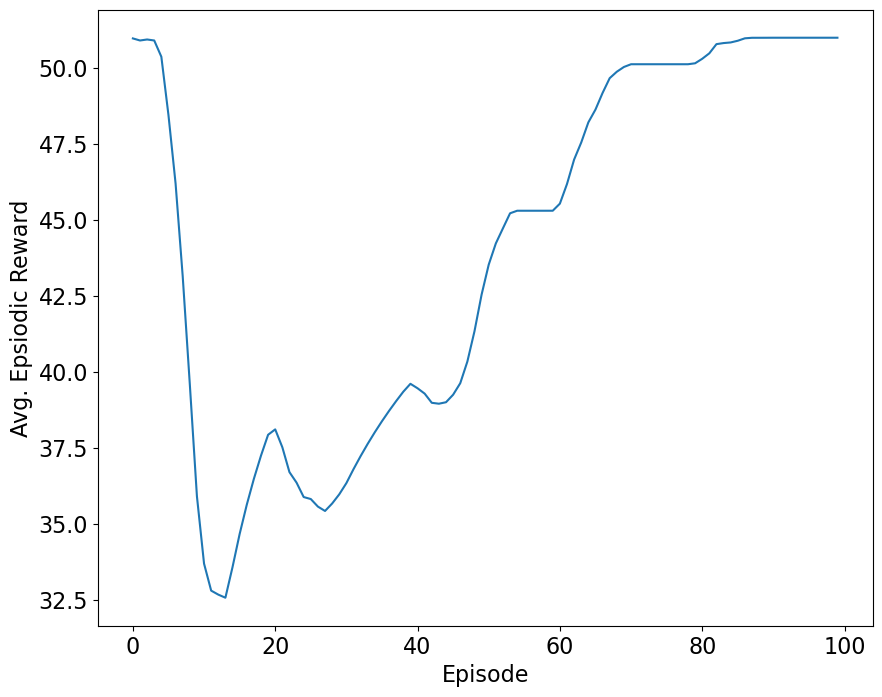

In [7]:
pandas_temp=pd.read_csv("avg_reward_list.csv",index_col=0)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100, 'font.size':16})
plt.plot(pandas_temp)
plt.xlabel("Episode")
plt.ylabel("Avg. Epsiodic Reward")
plt.show()


In [8]:
print(len(states_record))
df=pd.DataFrame(states_record)
df['rate']=df['rate']*column1_max
df['util']=df['util']*column2_max
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100, 'font.size':15})

5200


# Saving individual Episodes csv files

In [9]:
import pickle

a_file = open("new_states_dict.pkl", "rb")
output = pickle.load(a_file)
new_states_dict=output

# Comparison of MPCC and DDPG-MPCC with average values each episode

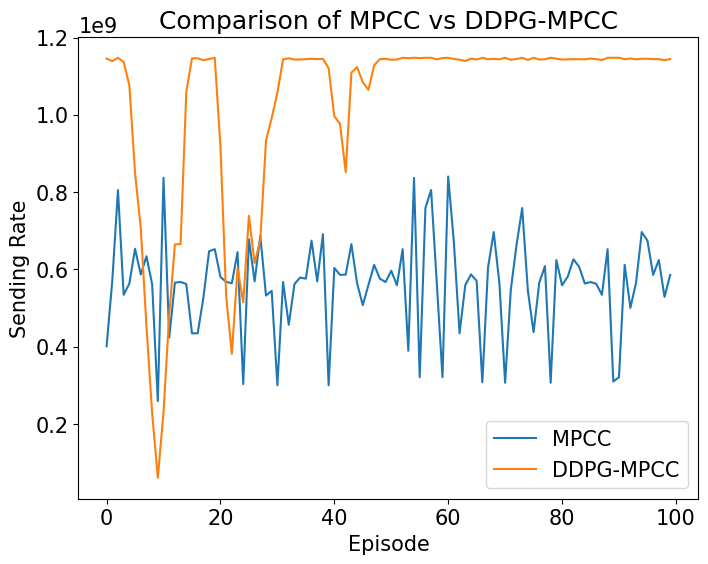

In [10]:
from turtle import color

graph_avg_list=[]

total_episodes=50
for group in new_states_dict:
  temp2=pd.DataFrame(new_states_dict[group])
  df=pd.read_csv("rlinputdata.csv", parse_dates=True)

  temp2['rate']=temp2['rate']*column1_max
  temp2['util']=temp2['util']*column2_max

  input=float(temp2.head(1)["rate"])
  cur_index=int(df.iloc[(df['rate']-input).abs().argsort()[:1]].index.to_list()[0])
  temp1=df.iloc[(cur_index):(cur_index+total_episodes+1)]

  reindex_list=[]
  for i in range(total_episodes+1):
    reindex_list.append(i)


  temp1=temp1.reset_index(drop=True)



  tempcolumn='rate'

  temp1[tempcolumn] = temp1[tempcolumn].astype(int)
  temp1=temp1[[tempcolumn]]


  temp2=temp2[[tempcolumn]]

  graph_avg_dict={"Episode Number":group,"mpcc_avg_value":temp1[tempcolumn].mean(),"ddpg_avg_value":temp2[tempcolumn].mean()}

  graph_avg_list.append(graph_avg_dict)



pdtemp=pd.DataFrame(graph_avg_list)
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import figure

fig = plt.gcf()
title="Comparison of MPCC vs DDPG-MPCC"

plt.title(title)
plt.xlabel("Episode")
plt.ylabel("Sending Rate")



# plt.plot(temp1.index,temp1['rate'],label="rate")
plt.plot(pdtemp.index,pdtemp['mpcc_avg_value'],label='MPCC')
# plt.text(pdtemp.index[-1], pdtemp['mpcc_avg_value'].to_list()[-1], "MPCC")

# plt.plot(temp2.index,temp2['rate'],label="rate")
plt.plot(pdtemp.index,pdtemp['ddpg_avg_value'],label='DDPG-MPCC')
# plt.text(pdtemp.index[-1], pdtemp['ddpg_avg_value'].to_list()[-1], "DDPG-MPCC")

plt.legend(['MPCC','DDPG-MPCC'])
plt.show()

fig.savefig("MPCC_compare_DDPG_rate.png", dpi=100,facecolor='white', transparent=False)

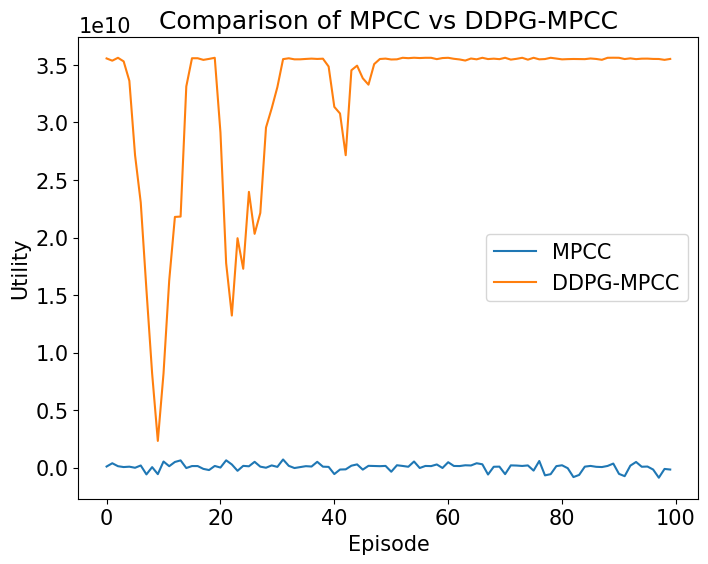

In [11]:
from turtle import color

graph_avg_list=[]

total_episodes=50
for group in new_states_dict:
  temp2=pd.DataFrame(new_states_dict[group])
  df=pd.read_csv("rlinputdata.csv", parse_dates=True)

  temp2['rate']=temp2['rate']*column1_max
  temp2['util']=temp2['util']*column2_max

  input=float(temp2.head(1)["rate"])
  cur_index=int(df.iloc[(df['rate']-input).abs().argsort()[:1]].index.to_list()[0])
  temp1=df.iloc[(cur_index):(cur_index+total_episodes+1)]

  reindex_list=[]
  for i in range(total_episodes+1):
    reindex_list.append(i)


  temp1=temp1.reset_index(drop=True)



  tempcolumn='util'

  temp1[tempcolumn] = temp1[tempcolumn].astype(int)
  temp1=temp1[[tempcolumn]]


  temp2=temp2[[tempcolumn]]

  graph_avg_dict={"Episode Number":group,"mpcc_avg_value":temp1[tempcolumn].mean(),"ddpg_avg_value":temp2[tempcolumn].mean()}

  graph_avg_list.append(graph_avg_dict)



pdtemp=pd.DataFrame(graph_avg_list)
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import figure

fig = plt.gcf()
title="Comparison of MPCC vs DDPG-MPCC"

plt.title(title)

# plt.plot(temp1.index,temp1['rate'],label="rate")
plt.plot(pdtemp.index,pdtemp['mpcc_avg_value'],label="MPCC")

# plt.plot(temp2.index,temp2['rate'],label="rate")
plt.plot(pdtemp.index,pdtemp['ddpg_avg_value'],label="DDPG-MPCC")

plt.xlabel("Episode")
plt.ylabel("Utility")
plt.legend(['MPCC','DDPG-MPCC'])
plt.show()
plt.show()

fig.savefig("MPCC_compare_DDPG_utility.png", dpi=100,facecolor='white', transparent=False)

In [12]:
'{:.20f}'.format(float(pdtemp.head(1)['mpcc_avg_value']))

'99561961.33333332836627960205'

In [13]:
'{:.20f}'.format(float(pdtemp.head(1)['ddpg_avg_value']))

'35562031686.27451324462890625000'